In [58]:
import matplotlib.pyplot as plt 
import numpy as np

In [20]:
R=4660#meas
C=4.772e-6# nom 4.7uF
To=R*C
To

0.02223752

In [22]:
1000*To/3

7.412506666666666

In [60]:
import serial
import time
import matplotlib.pyplot as plt 
import numpy as np
def Get_Data(port = 'COM5', bps= 115200):
    # Replace 'COM3' with your Arduino port (on Linux it may be '/dev/ttyUSB0')
    ser = serial.Serial(port, bps, timeout=1)  # baud rate must match Arduino
    time.sleep(2)  # wait for Arduino reset
    arr=[]
    
    
    # Send '#' to Arduino
    ser.write(b"#")  # sends the byte '#' to Arduino
    
    
    try:
        while True:
            line = ser.readline().decode('utf-8').strip()  # read a line
            if line:
                #print(line)
                arr.append(line)
            if "END" in line:
                break
    except KeyboardInterrupt:
        ser.close()
    
    
    ser.close()
    return ser, arr 

In [142]:
import pandas as pd 
def arr_to_df(arr, cols = None):
    arr2= []
    start = False 
    for x in arr:
        if "##START" in x: 
            start = True 
            continue 
        if not start: 
            continue 
        if x=="END": 
            break 
        try: 
            vals= x.split('\t')
            if vals[0] =="#data":
                arr2.append(np.array(vals[1:]).astype("int"))
        except: 
            pass
    if cols is None: 
        df = pd.DataFrame(arr2)
    else : 
        df = pd.DataFrame(arr2, columns = cols)
    return df
        

<Axes: xlabel='t'>

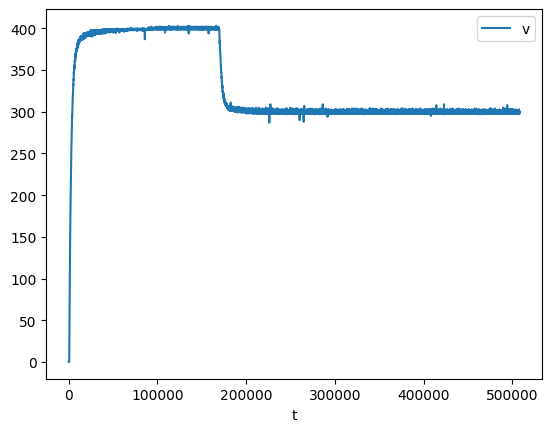

In [144]:
ser, arr =Get_Data( 'COM5')
ser.close()
df = arr_to_df(arr, cols =["t", "v"])
df.plot(x="t", y="v")

In [145]:
len(df), len(arr)

(9998, 10079)

In [146]:
To

0.02223752

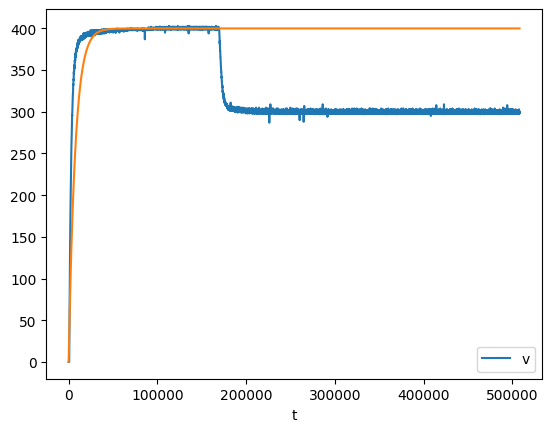

In [153]:
df.plot(x="t", y="v")
To = 0.0222
plt.plot(df.t, 400*(1-np.exp(-1e-6*df.t*3/To)))

In [148]:
df.t.diff()

0         NaN
1       257.0
2        51.0
3        51.0
4        50.0
        ...  
9993     51.0
9994     51.0
9995     51.0
9996     50.0
9997     51.0
Name: t, Length: 9998, dtype: float64

In [149]:
df.t.diff().iloc[2:].value_counts()

t
51.0     7665
50.0     2292
52.0       23
53.0        4
55.0        4
59.0        3
58.0        2
54.0        1
102.0       1
101.0       1
Name: count, dtype: int64

In [150]:
df.head()

,t,v
0,8,0
1,265,0
2,316,0
3,367,0
4,417,0


In [151]:
df.to_csv("df_V2.csv")

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("df_V2.csv")

In [12]:
df.loc[:,"difft"]=df.t.diff()

In [16]:
df[df.difft>60]

,Unnamed: 0,t,v,difft
1,1,265,0,257.0
1728,1728,88045,399,102.0
4729,4729,240526,298,101.0


In [19]:
1728/len(df), 4729/len(df)

(0.17283456691338267, 0.47299459891978396)